In [1]:
%%capture
# set up path to include parent directory
import sys
sys.path.append('../')

# Import everything from the data_utils library
from data_utils import *

# Load the talk data
talk_data = get_only_talks(load_data())

In [2]:
# Import libraries and setup matplotlib defaults
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
pl.style.use('bmh')
prop_cycle = pl.cycler(color=['#377eb8','#e41a1c','#4daf4a','#984ea3',
                              '#ff7f00','#ffff33','#a65628','#f781bf','#999999'])
pl.rcParams.update({
    'axes.prop_cycle': prop_cycle,
    'lines.linewidth': 2,
    'font.size': 20,
    'figure.figsize': [12, 8],
    'figure.subplot.left': 0.125,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.15})

In [3]:
rpm_str = 'references per million words'

# Create new date groups for 2 and 5 years at a time
talk_data['2y'] = pd.to_datetime(
    talk_data['date'].dt.year//2*20000+10101, format='%Y%m%d', utc=True)
talk_data['5y'] = pd.to_datetime(
    talk_data['date'].dt.year//5*50000+20701, format='%Y%m%d', utc=True)

def text_search_plot(search, title_str, leg_loc=None, spacer=' ', group='2y', filename=None):
    if 'top_user' not in search.keys():
        search.update({'top_user': 'true'})
    result = text_search(talk_data, search, group=group, spacer=spacer, quiet=True)
    fig, ax = pl.subplots()
    result.plot(ax=ax, legend=False, title=title_str, ylabel=rpm_str, xlabel='year')
    pl.legend(result.columns, loc=leg_loc)
    #pl.grid(axis='x')
    #ax.set_xlim(daterange)
    ax.set_ylim(bottom=0)
    if filename!=None:
        pl.savefig(filename)

In the project where I looked at the [phrases that changed the most in usage over time](https://qhspencer.github.io/lds-data-analysis/changes/), one of the more surprising findings was the fact that the phrase "scripture study", a phrase that is today used quite regularly, was never said over the pulpit before 1975:

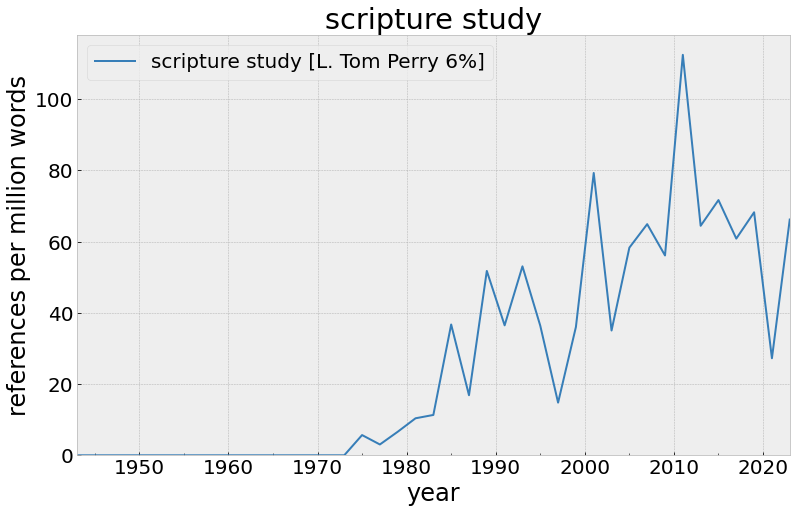

In [4]:
text_search_plot(
    {'search': [{"include": "scripture study"}]}, 'scripture study', group='2y')

The remarkable recency of talking about scripture study suggests a follow-up question: what is the history of other practices that are commonly associated with being a "good" Mormon? It has been suggested that the church has developed a bit of a "checklist" culture, in which one is expected to complete a list of practices in one's daily life or over the course of one's life even though they aren't necessarily enumerated in the scriptures. In order to investigate this in more detail I came up with the following list of examples:

 - reading of scriptures
 - personal and family prayer
 - Family Home Evening
 - geneaology and temple attendance
 - Scouting and Young Women awards
 - going on a mission
 - home teaching, visiting teaching, and ministering

Each of these examples is investigated in more detail below.

## Scripture study
The plot below includes various references to scripture study. The most common phrases are "scripture study", "scripture reading", and a number of variants on "read the scriptures" and "study the scriptures" (such as study the holy scriptures). These variants have all been lumped into 4 main categories shown in the plot below. We can see that there are a few of these phrases that were used before the 1970s, but generally speaking they all follow a similar trend of increasing in usage quite significantly roughly during the 1970s and 1980s.

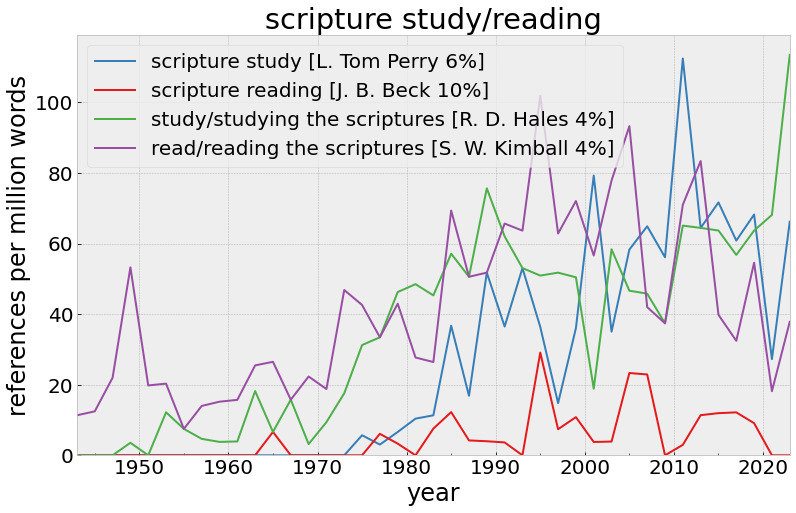

In [5]:
text_search_plot(
    {'search': [
        {"include": "scripture study"},
        {"include": "scripture reading"},
        {"include": "study[^.,]{,15}scriptures", "label": "study/studying the scriptures"},
        {"include": "read[^.,]{,12}scriptures", "label": "read/reading the scriptures"}]},
    'scripture study/reading', group='2y')

## Prayer
References to prayer as a regular habit mostly fall under "daily prayer", "personal prayer" and "family prayer". Relative to scripture study it's talked about a bit less. Personal prayer and daily prayer have increased a bit over time, while family prayer has remained much more constant over the last several decades and is talked about with greater frequency overall.

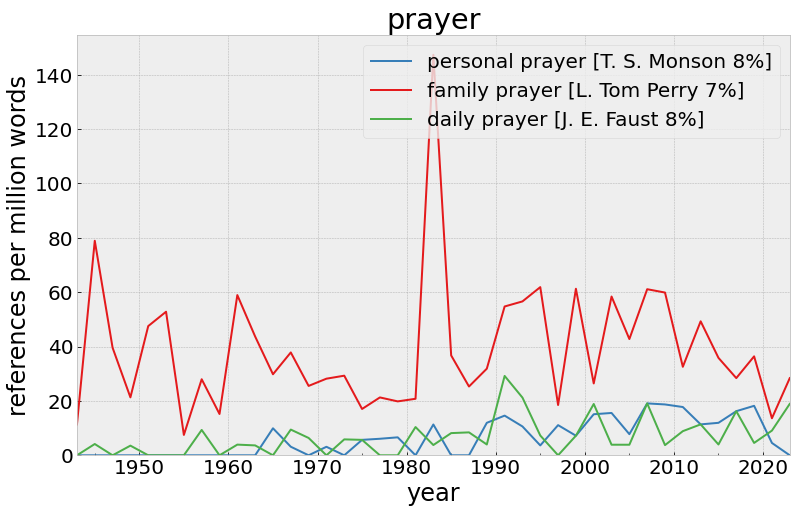

In [6]:
text_search_plot(
    {'search': [
        {"include": "personal prayer"},
        {"include": "family prayer"},
        {"include": "daily prayer"}]},
    'prayer', group='2y')

## Family Home Evening
It's very obvious from the data the moment the concept of Family Home Evening was introduced: October 1964. It immediately becomes a regular topic in general conference. Mentions increase gradually over time, hitting a peak in the early 2000s, but in the last few years it has become less frequent, dropping to levels not seen since the program was introduced.

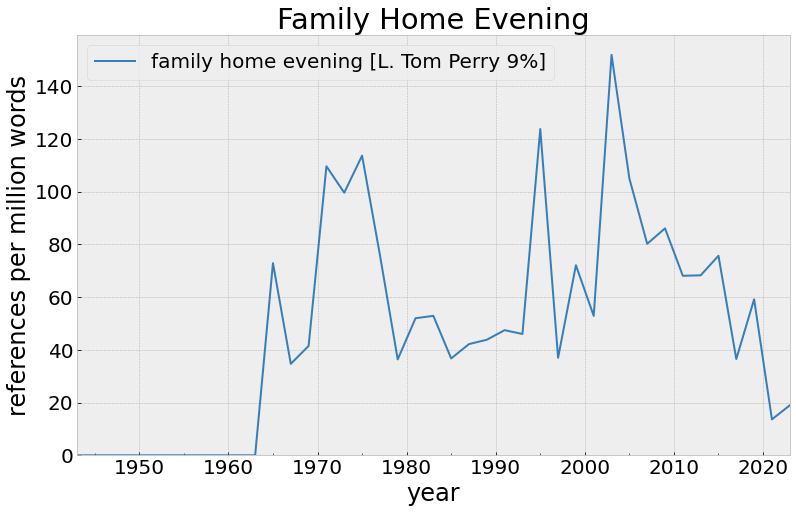

In [7]:
#first_users(talk_data, 'family home evening')

text_search_plot(
    {'search': [
        {"include": "family home evening"}]},
    'Family Home Evening', group='2y')

## Temple and family history
The plot below includes references to both "genealogy" and "family history". The latter became the preferred term in the late 1980s, and quickly surprassed the frequency with which genalogy had ever been mentioned in the preceding decades. Also included in the plot is temple attendance. This includes all references to "temple worship", "temple attendance", and variations on "attending the temple". These, rather than just general references to the temple, denote attending the temple as a specific practice expected of church members. We can see that there is an approximately parallel trend of speaking of this practice, in similar magnitude and timing, coinciding with speaking of "family history" instead of "genalogy"

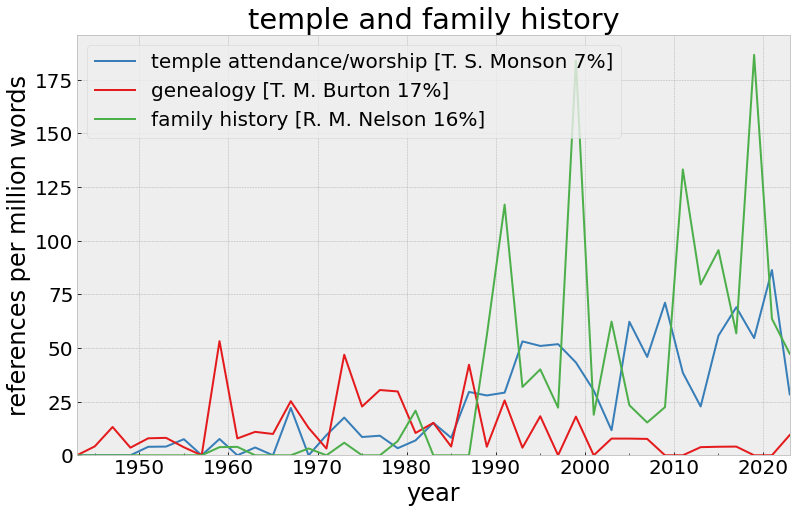

In [8]:
text_search_plot(
    {'search': [
        {"label": "temple attendance/worship",
         "include": "(attend[^,.]{,15}[^,.]temple|temple attendance|temple worship)"},
        {"include": "genealogy"},
        {"include": "family history"}]},
    'temple and family history', group='2y')

## Youth awards
In the 1980s posters were made of a quote from a Spencer W. Kimball that extolled the potential of young men who had completed the checklist of ordinations and missionary service, and young women who had completed a parallel list of accomplishments. In both cases the lists included achieving of awards. The plot below shows mentions in general conference of the Eagle Scout rank in Boy Scouts, the Duty to God award, and the Young Womanhood recognition award. In general these are not spoken of with the same frequency as some of the other "checklist" items previously mentioned, but to the extent that they are talked about in general conference, most of it has been in the 1980s-2010s. The total absence of these in the last 5 years is likely a result of the church revamping its youth programs.

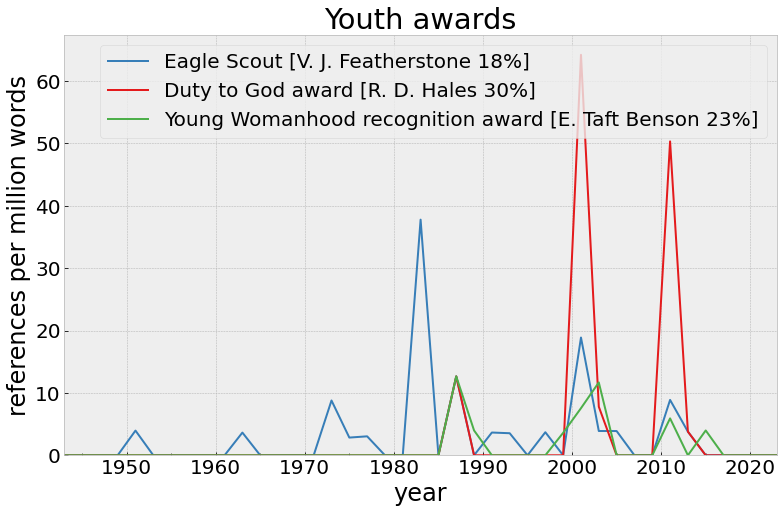

In [9]:
#top_contexts(talk_data, "eagle", before=0, after=1)
#top_contexts(talk_data, "young womanhood", before=0, after=1)
#top_contexts(talk_data, "duty to god", before=0, after=1)

text_search_plot(
    {'search': [
        {"label": "Eagle Scout", "include": "(eagle scout|eagle rank|eagle award)"},
        {"label": "Duty to God award",
         "include": "duty to god (award|requirements|service|booklet|program)"},
        {"label": "Young Womanhood recognition award",
         "include": "young womanhood (recognition|medallion)"}]},
    'Youth awards', group='2y')

## Missions
It was during the presidency of Spencer W. Kimball that missionary service became expected of young men in a way it hadn't been previously, which corresponds in time with the rise in many of the other checklist items. In general, the terms "mission" or "missionary work" have always been used quite heavily in general conference. Over the entire 80 year period being examined here, they occur pretty consistently with a frequency of around 1 per 1000 words. In order to focus specifically on the idea of going on a full-time mission as an expectation of young church members, the plot below focuses on variants of 3 different phrases: "serving a mission", "going on a mission", and "missionary service". While the idea of "serving a mission" may be a common word usage to many Mormons today, it did not come into its current regular usage until the mid 1980s. Perhaps one of the most curious patterns in the plot is the reduction in the use of all 3 phrases in the latter half of the 1960s. Most likely this is a reflection of the restrictive quotas that limited the church's ability to send out young missionaries during the Vietnam War.

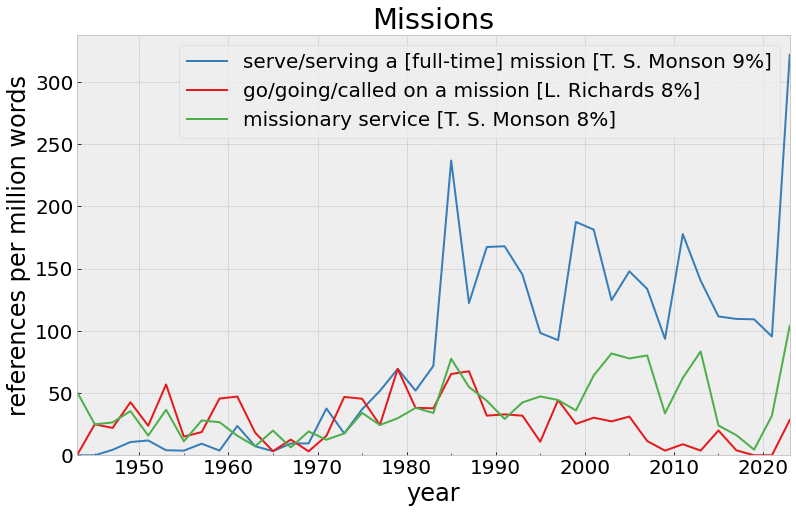

In [10]:
#top_contexts(talk_data, 'servi[^.]{,20} mission[^a]', before=0, after=0)

text_search_plot(
    {'search': [
        {"label": "serve/serving a [full-time] mission",
         "include": "serv(e|i)[^.]{,20} mission[^a]"},
        {"label": "go/going/called on a mission",
         "include": "(go|going|went|called) on a mission"},
        {"include": "missionary service"}]},
    'Missions', group='2y')

## Home & visiting teaching
One of the classic items to check of one's list for being a dedicated member of the church has always been carrying out home and visiting teaching assignments. As this program was phased out in recent years in favor of the new but similar "ministering" program, the plot below includes it as well. References to the word "ministering" in general conference are abundant and many of them don't necessarily apply to the program by that name, such as references to "ministering of angels". In order to narrow the search down to the type of ministering that the church program is meant to include, searches on the word ministering were restricted to cases where it was followed by one of the following words: "to", "as", "and", "brother", "sister". Each of these generally tended to occur in contexts discussing the church ministering program.

The plot reveals clearly that the home teaching program as we knew it was introduced in the mid 1960s, and the visiting teaching program somewhat later. Unsurprisingly, there is a big surge in talk about "ministering" when that program was introduced in 2018.

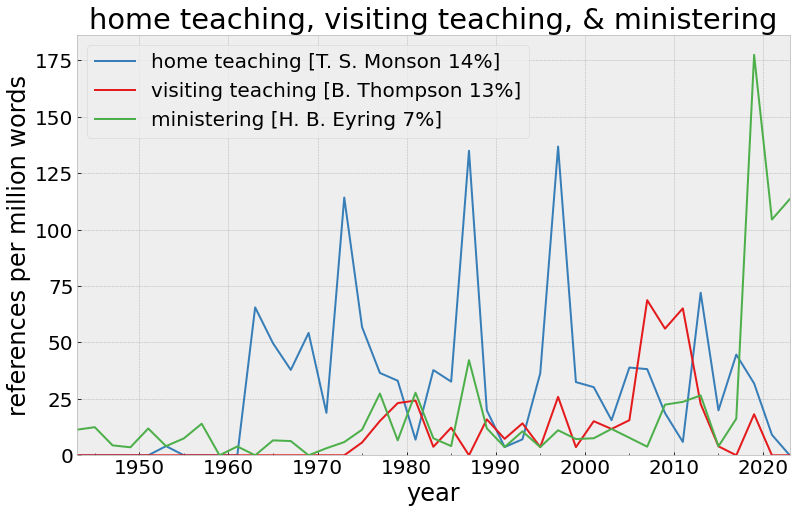

In [11]:
text_search_plot(
    {'search': [{"include": "home teaching"},
                {"include": "visiting teaching"},
                {"label": "ministering",
                 "include": "ministering (to|as|and|brother|sister)"}]},
    'home teaching, visiting teaching, & ministering', group='2y')

## The whole checklist
The plot below shows each of the "checklist" items in a single chart, with the general categories grouped together. In this plot we can see the trend starting roughly in the mid 1970s where nearly every one of the items grew significantly in mentions, and then plateaued at a higher level by the mid 1980s. We can also see how much the various categories are spoken about relative to each other, for example going on missions, scripture study, and temple attendance are talked about far more frequently than prayer, and Family Home Evening, and the youth awards are far less frequently mentioned than any of them.

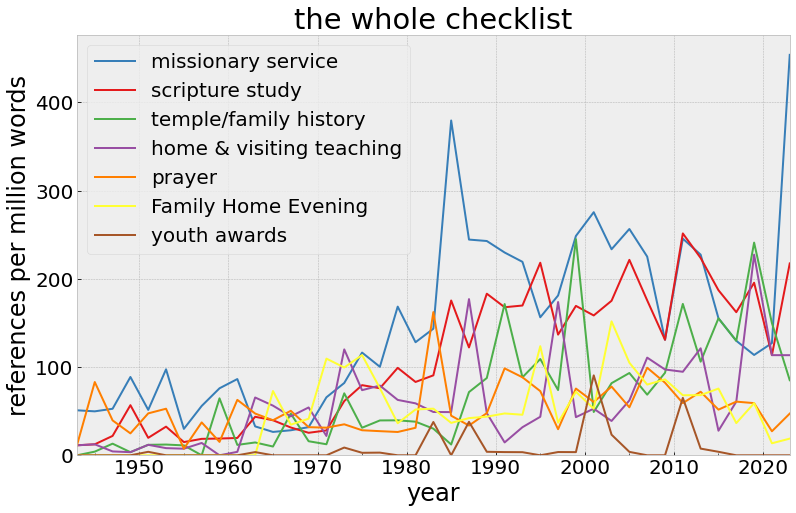

In [12]:
big_list = [
    {"label": "missionary service",
     "include": "(serv(e|i)[^.]{,20} mission[^a]|(go|going|went|called) on a mission|missionary service)"},
    {"label": "scripture study",
     "include": "(scripture study|scripture reading|study[^.,]{,15}scriptures|read[^.,]{,12}scriptures)"},
    {"label": "temple/family history",
     "include": "(attend[^,.]{,15}[^,.]temple|temple attendance|temple worship|"
     "family history|genealogy)"},
    {"label": "home & visiting teaching",
     "include": "((home|visiting) teaching|ministering (to|as|and|brother|sister))"},
    {"label": "prayer",
     "include": "(personal|family|daily) prayer"},
    {"label": "Family Home Evening",
     "include": "family home evening"},
    {"label": "youth awards",
     "include": "(eagle scout|eagle rank|eagle award|duty to god (award|requirements|service|booklet|program)|young womanhood (recognition|medallion))"}
]

text_search_plot(
    {'search': big_list, 'top_user': 'false'},
    'the whole checklist',
    group='2y'
)

The plot below shows the overall trend of all checklist items over time. We observe a relatively constant level around 200 mentions per million words throughout the 1940s-1960s, an inflection point starting in the early 1970s, and an acceleration that ends in a new plateau around 700 mentions per mission words from the mid 1980s to the present day.

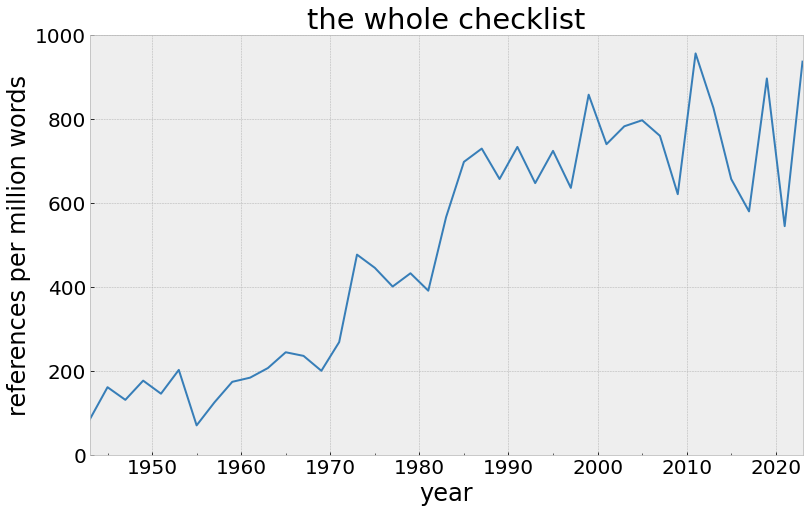

In [13]:
text_search_plot(
    {'search': [{'label': '', 'include': '('+'|'.join([x['include'] for x in big_list])+')'}],
     'top_user': 'false'},
    'the whole checklist', group='2y')
pl.gca().get_legend().remove()

## What happened in 1970?
The sharp increase in talking about all of the checklist items that occurred between 1970 and 1985 raises the question what might have caused it.

One way to examine what other changes were occuring in that period is to run a more narrowly focused change analysis. This time, instead of looking at multi-decade eras, we take the years 1965-1974, count the number of times words and phrases were used in that period relative to all of the years leading up to 1965 (from 1942 where our data begins). The "change ratio" is the number of times a word or phrase was used in that 10 year period divided by the number of times it was used in the 23 years from 1942-1964.

The top change ratios in this test were some of the checklist phrases already examined here, specifically variants of "home evening" and "home teaching". If we ignore those, looking for the other phrases that rose to prominence specifically during that era, the next two are "drugs" and "pornography":

In [14]:
top_ngrams = pandas.read_pickle('../top_ngrams_60s.pkl')

top_ratios_1975 = (top_ngrams['1965-1974']/top_ngrams['1942-1964']).sort_values(ascending=False)

top_ratios_1985 = (top_ngrams['1975-1984']/
              (top_ngrams['1942-1964']+top_ngrams['1965-1974'])).sort_values(ascending=False)

drop_words = ['home teach', 'home evening', 'fellowmen']
for word in drop_words:
    top_ratios_1975 = top_ratios_1975[~top_ratios_1975.index.str.contains(word)]
    top_ratios_1985 = top_ratios_1985[~top_ratios_1985.index.str.contains(word)]

top_ratios_1975.index.name = 'word/phrase'
top_ratios_1975.to_frame().rename(columns={0:'usage change'})[:2]

,usage change
word/phrase,
drugs,13.30
pornography,9.75


The change ratios for both of these words are quite high, suggesting a quick increase in usage in the late 1960s. This is borne out in the usage history plot below, which also includes references to "sex" or "sexual" for comparison.

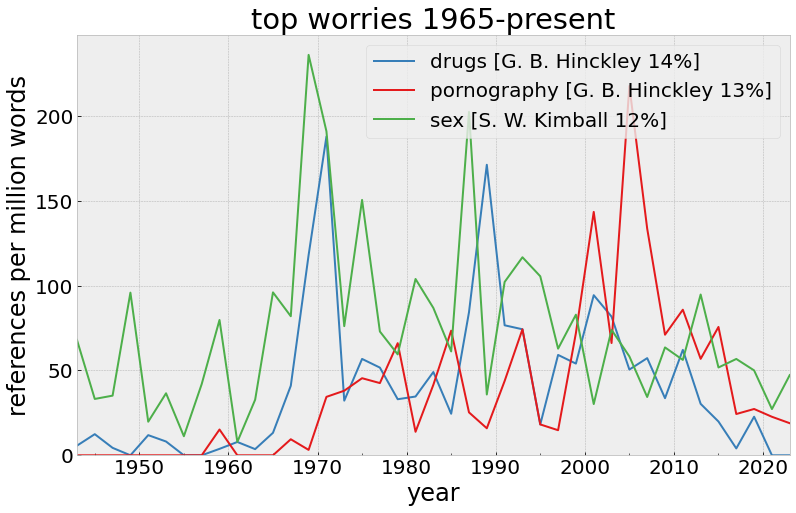

In [15]:
text_search_plot(
    {'search': [{'include':'drugs'},
                {'include':'pornography'},
                {'include':'sex'}]},
    'top worries 1965-present', group='2y')

The plot shows a sharp spike in references to both "sex" and "drugs" at the end of the 1960s. Because sex was referenced occasionally in the 1940s and 1950s it did not score as notably high on the change ratio score as references to drugs. Interestingly, references to drugs made a second surge in the late 1980s, corresponding with the anti-drug messaging that was prominent in the United States at the time. References to "pornography" jumped in the early 1970s and then underwent a significant second surge in the early 2000s with the rise of the internet.

It's clear from the data that the social changes of the 1960s elicited a response in general conference talks of the era, as leaders felt the need to speak about what they were observing in the broader culture. One possible explanation for the rise of the "checklist culture" in the church which arose roughly during the years 1970-1985 is that it is a response to the fears and anxieties that those social changes caused in church leaders and parents in particular. Their concerns about the influence of those cultural changes on the youth, and the increasingly long checklist of things for members to do could be seen as a search for solutions, a hope that doing all the things on the list would guard members from negative influences.

It is worth noting that this period of significant change in discourse also coincides with the correlation era, a series of organizational changes that standardized church curricula and centralized authority, but it's not really possible to say from the available data whether correlation played an influence on the trends observed here. Regardless, it seems apparent that the rhetorical shift in general conference addresses toward "checking all the boxes" that occurred roughly between 1970 and 1985 has had a profound impact on the lived experience of Mormonism for at least one and perhaps now two generations of members who came of age during or after that shift.

In [16]:
# Setup show/hide source code box
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="show/hide source code"></form>''')